In [6]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
expdir = "/homes_unix/jlegrand/data/Memento/output/prediction"
exppath = Path(expdir) / "k-3_feat-series_experimental-True_atlas-schaefer200_winsize-96_batchsize-crossval_niter-100_stamp-2024-07-09-10:02"

cv_results = pd.read_csv(Path(exppath) / "cv_results.csv", index_col=0)

In [26]:
(2 * 128) / 2.5

102.4

In [12]:
cv_results.sort_values(by="std_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_module__channel_func,param_module__num_conv_blocks,param_optimizer__lr,param_optimizer__weight_decay,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,1089.543860,823.146696,8.557636,6.941829,12,<function initial_bump at 0x7f73592bf6a0>,5,0.000010,0.000026,"OrderedDict({'batch_size': 12, 'module__channe...",0.319292,0.328193,0.314218,0.322387,0.303739,0.317566,0.008265,35
11,96.076355,29.428490,1.383082,0.897924,23,<function constant_channels at 0x7f73590c87c0>,1,0.000272,0.000010,"OrderedDict({'batch_size': 23, 'module__channe...",0.312622,0.334249,0.314924,0.307894,0.313580,0.316654,0.009111,40
60,641.802641,298.423894,5.711663,3.919988,5,<function initial_bump at 0x7f73592bf6a0>,1,0.002310,0.004420,"OrderedDict({'batch_size': 5, 'module__channel...",0.329515,0.331242,0.315659,0.344094,0.319384,0.327979,0.009983,9
80,107.418831,24.601342,0.870803,0.566179,81,<function constant_channels at 0x7f73590c87c0>,5,0.000057,0.000023,"OrderedDict({'batch_size': 81, 'module__channe...",0.310094,0.322827,0.321807,0.346302,0.329243,0.326055,0.011860,13
64,41.218229,10.286756,0.743823,0.563692,1007,<function fast_increase at 0x7f73590c8680>,3,0.000360,0.000103,"OrderedDict({'batch_size': 1007, 'module__chan...",0.300483,0.319128,0.318531,0.340055,0.324334,0.320506,0.012677,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,36.505471,11.998110,0.510951,0.307162,100,<function default_channel_func at 0x7f73590c8720>,1,0.000216,0.001177,"OrderedDict({'batch_size': 100, 'module__chann...",0.318511,0.292395,0.220463,0.338218,0.368317,0.307581,0.050134,70
99,99.881548,52.979634,0.725880,0.464470,62,<function slow_increase at 0x7f73590c85e0>,4,0.100000,0.000082,"OrderedDict({'batch_size': 62, 'module__channe...",0.312148,0.294999,0.199471,0.336134,0.335430,0.295636,0.050486,91
62,36.999276,8.683772,0.510419,0.317491,1024,<function initial_bump at 0x7f73592bf6a0>,5,0.023589,0.002869,"OrderedDict({'batch_size': 1024, 'module__chan...",0.321477,0.314101,0.174216,0.326258,0.312563,0.289723,0.057967,96
1,382.551703,173.438215,2.632614,1.863848,14,<function constant_channels at 0x7f73590c87c0>,4,0.088453,0.020888,"OrderedDict({'batch_size': 14, 'module__channe...",0.257544,0.270423,0.129111,0.301764,0.249787,0.241726,0.059035,99


Batch size is not so important, set around 200?


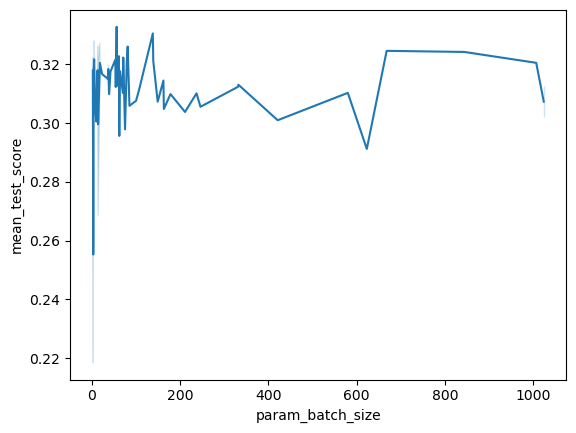

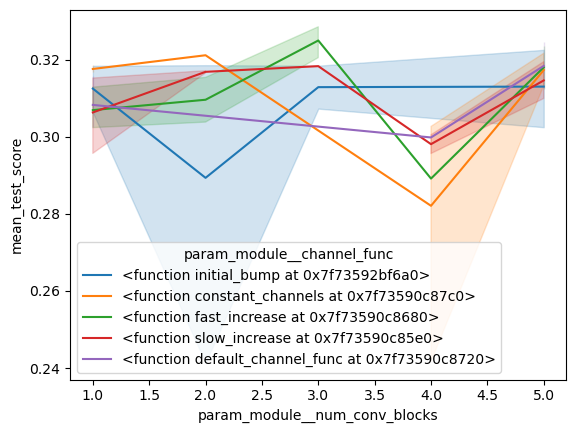

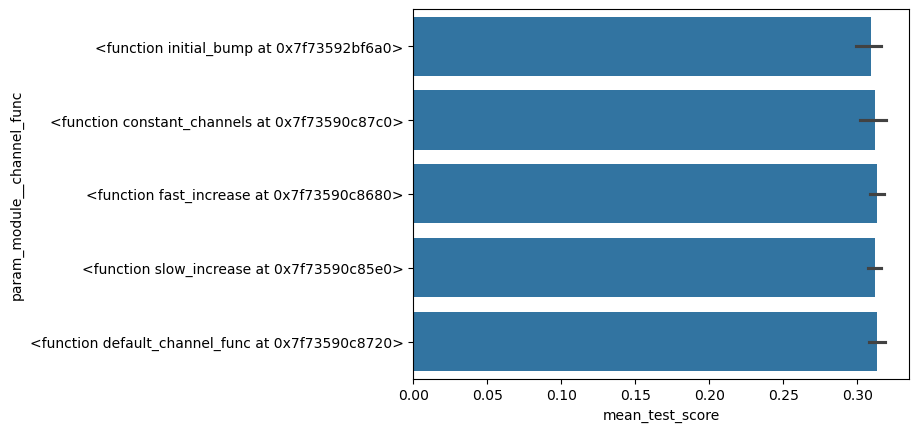

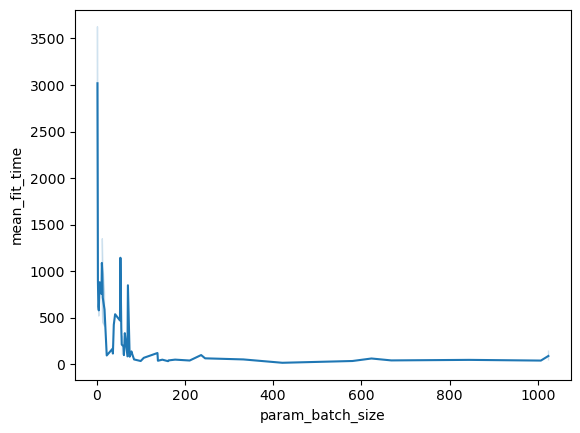

In [21]:
import seaborn as sns
sns.lineplot(cv_results, x="param_batch_size", y="mean_test_score")
plt.show()
sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score", hue="param_module__channel_func")
plt.show()
sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
plt.show()
sns.lineplot(cv_results, x="param_batch_size", y="mean_fit_time")
plt.show()

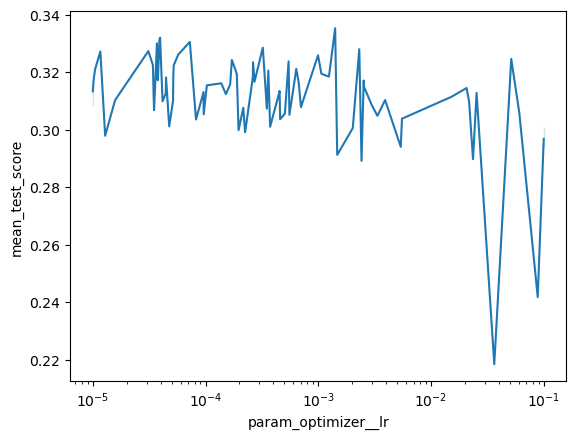

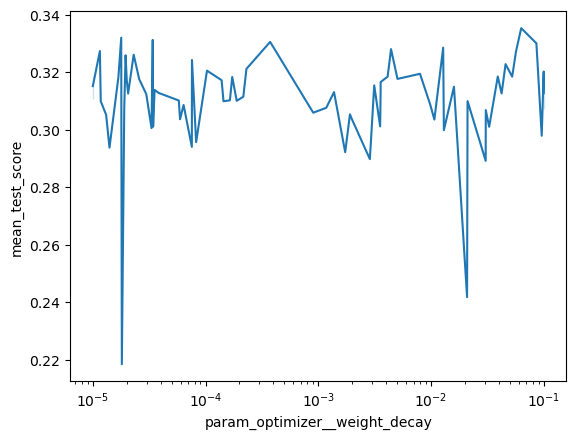

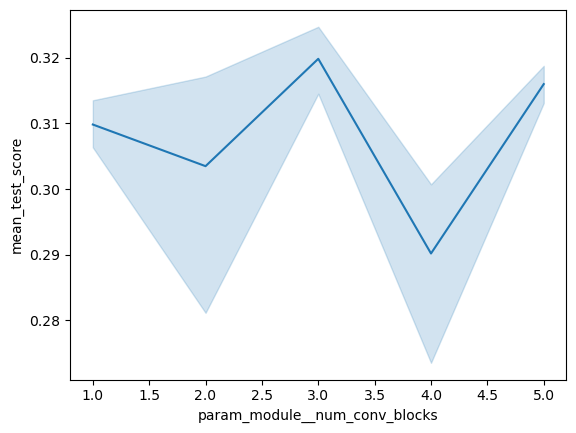

In [22]:
#sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
#plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__lr", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__weight_decay", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score")
plt.show()